# Health Burden

## Set up

In [50]:
# Read in data
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
data = pandas.read_csv('./data/prepped/risk-data.csv')

## Data Structure
To get a basic sense of your dataset, check the following:

- How large is the dataset (rows, columns)?
- What are the variables present in the dataset?
- What is the data type of each variable?

In [62]:
#Name and data type of each column, number of rows
data.info()

Number of rows: 1950
Number of columns: 12

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1950 entries, 0 to 1949
Data columns (total 12 columns):
country         1950 non-null object
country.code    1950 non-null object
super.region    1950 non-null object
region          1950 non-null object
sex             1950 non-null object
age             1950 non-null object
pop             1950 non-null float64
alcohol.use     1950 non-null float64
drug.use        1950 non-null float64
high.meat       1170 non-null float64
low.exercise    1170 non-null float64
smoking         1170 non-null float64
dtypes: float64(6), object(6)
memory usage: 198.0+ KB



## Univariate Analysis
For each variable of interest, answer the following questions. As you do so, begin making a list of further questions you would like to investigate:

- What does the distribution of each (risk factor) variable look like?
- Is any variable ever missing (and if so, why)?
- What are the basic summary statistics (mean, median, standard deviation) each variable, and what is it's range (min/max)?
- What do you find surprising?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10be30a90>]], dtype=object)

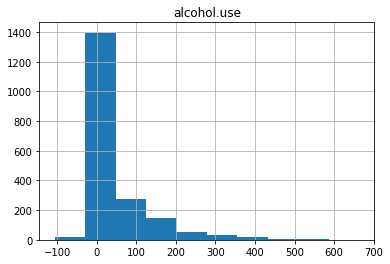

In [51]:
data.hist(column='alcohol.use')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x105e122b0>]], dtype=object)

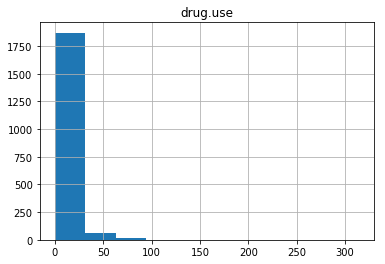

In [52]:
data.hist(column='drug.use')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x105f212b0>]], dtype=object)

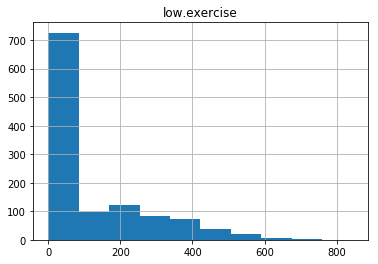

In [54]:
data.hist(column='low.exercise')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109efa2e8>]], dtype=object)

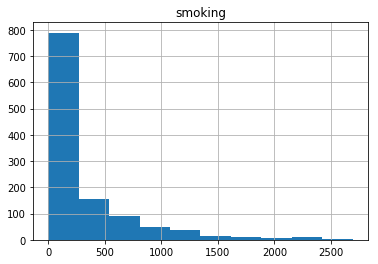

In [55]:
data.hist(column='smoking')

In [56]:
#summary statistics
data.describe()

,pop,alcohol.use,drug.use,high.meat,low.exercise,smoking
count,1.950000e+03,1950.000000,1950.000000,1170.000000,1170.000000,1170.000000
mean,3.777708e+06,47.146545,7.128357,2.594225,119.552443,299.520438
std,1.913391e+07,86.009150,14.197640,4.043355,153.239610,437.167168
min,3.563755e+02,-106.232008,0.000038,0.000176,0.308731,0.532166
25%,1.000900e+05,0.273705,0.030068,0.154818,4.033243,19.149328
50%,5.054975e+05,6.784878,1.917572,0.817486,40.743931,105.816725
75%,2.071966e+06,54.987255,8.528416,3.286753,209.803827,409.049890
max,3.901690e+08,662.914151,314.625888,36.087746,844.249502,2691.239677


## Univariate analysis (by age)
In this section, you should investigate how each (risk-variable) varies by **age group**. More specifically, consider if the distribution of each variable of interest (smoking, alcohol use, etc.) is consistent across age-groups.

In [64]:
by_age_group = data.groupby('age')
by_age_group.var()

,pop,alcohol.use,drug.use,high.meat,low.exercise,smoking
age,,,,,,
15-49 years,1.435673e+15,524.396972,50.251381,0.033921,9.965789,332.976993
5-14 years,1.242001e+14,0.252382,0.048006,NaN,NaN,NaN
50-69 years,1.801165e+14,6431.942739,218.063020,5.094242,1574.581760,42646.128555
70+ years,1.368738e+13,16283.156371,502.228419,29.434084,17044.450774,306044.855367
Under 5,3.222366e+13,0.059060,0.132079,NaN,NaN,NaN


## Univariate analysis (by sex)
In this section, you should investigate how each (risk-variable) varies by **sex group**. More specifically, consider if the distribution of each variable of interest (smoking, alcohol use, etc.) is consistent across sex-groups. Depending on your procedure, you may need to **reshape your data**.

In [65]:
by_sex = data.groupby('sex')
by_sex.var()

,pop,alcohol.use,drug.use,high.meat,low.exercise,smoking
sex,,,,,,
female,3.425689e+14,3587.936374,20.885009,11.880678,21916.856912,44340.854522
male,3.900180e+14,10316.100801,344.020358,20.492391,24925.942504,286813.428610


## Univariate analysis (by country)
In this section, you should investigate how each (risk-variable) varies by **country**. Given the number of countries present in the dataset, I suggest that you aggregate your data by region. In order to do this, you'll need to **convert death rates to deaths** using the `pop` column.

In [66]:
by_country = data.groupby('country')
by_country.var()

,pop,alcohol.use,drug.use,high.meat,low.exercise,smoking
country,,,,,,
Afghanistan,8.049909e+12,3972.853708,23.018232,3.024129,124619.883728,248433.522923
Albania,6.034412e+10,2729.295504,94.471534,0.255820,8032.682372,295288.904329
Algeria,1.366836e+13,373.703440,23.802389,0.067442,27705.331715,25882.857139
American Samoa,4.803741e+07,651.179727,12.316605,26.739700,34446.494683,186440.314926
Andorra,3.564845e+07,1232.968364,34.122777,17.381623,7108.060195,144358.893283
Angola,4.104234e+12,16194.884393,74.562760,4.863272,21927.367209,93608.162784
Antigua and Barbuda,7.172129e+07,3920.695209,52.291024,8.464683,38875.968842,8805.361209
Argentina,1.266535e+13,3990.411712,503.943526,76.671542,7995.160263,203879.534525
Armenia,6.849977e+10,442.428820,223.925279,2.312589,41275.681186,715699.090450


## Bivariate analysis
In this section, you should compare risks-variables to one another to see how they co-vary. Use simple statistical tests (i.e., **correlation**) and visualization as you see fit. 

In [67]:
data.corr()

,pop,alcohol.use,drug.use,high.meat,low.exercise,smoking
pop,1.000000,-0.036410,-0.006910,-0.088704,-0.116437,-0.082514
alcohol.use,-0.036410,1.000000,0.579759,0.263786,0.342020,0.500360
drug.use,-0.006910,0.579759,1.000000,0.255343,0.243125,0.507995
high.meat,-0.088704,0.263786,0.255343,1.000000,0.529295,0.491145
low.exercise,-0.116437,0.342020,0.243125,0.529295,1.000000,0.626681
smoking,-0.082514,0.500360,0.507995,0.491145,0.626681,1.000000


In [37]:
data

,country,country.code,super.region,region,sex,age,pop,alcohol.use,drug.use,high.meat,low.exercise,smoking
0,China,CHN,"Southeast Asia, East Asia, and Oceania",East Asia,male,70+ years,3.818010e+07,336.913532,40.210751,5.069854,248.266850,1944.480464
1,China,CHN,"Southeast Asia, East Asia, and Oceania",East Asia,female,50-69 years,1.530703e+08,21.000557,4.697916,1.077716,12.919982,37.807709
2,China,CHN,"Southeast Asia, East Asia, and Oceania",East Asia,male,Under 5,4.458679e+07,0.236908,0.120827,NaN,NaN,NaN
3,China,CHN,"Southeast Asia, East Asia, and Oceania",East Asia,male,5-14 years,8.299538e+07,1.292633,0.038498,NaN,NaN,NaN
4,China,CHN,"Southeast Asia, East Asia, and Oceania",East Asia,male,15-49 years,3.901690e+08,35.849941,5.677337,0.188490,3.058205,30.797507
5,China,CHN,"Southeast Asia, East Asia, and Oceania",East Asia,male,50-69 years,1.564822e+08,152.433338,17.357274,1.775641,34.520583,374.538684
6,China,CHN,"Southeast Asia, East Asia, and Oceania",East Asia,female,5-14 years,7.148107e+07,0.868670,0.039037,NaN,NaN,NaN
7,China,CHN,"Southeast Asia, East Asia, and Oceania",East Asia,female,15-49 years,3.651006e+08,4.693057,1.751538,0.099397,0.899956,2.656216
8,China,CHN,"Southeast Asia, East Asia, and Oceania",East Asia,female,Under 5,3.854704e+07,0.183050,0.126190,NaN,NaN,NaN
9,China,CHN,"Southeast Asia, East Asia, and Oceania",East Asia,female,70+ years,4.285894e+07,77.304879,12.989478,3.055658,156.526978,585.964182
